In [28]:
!rm -rf demo_dataset.zip

In [ ]:
!unzip TENNIS_DATASET.zip -d /content/demo_dataset.zip

In [58]:
import glob
import pandas as pd
import numpy as np

# Get CSV files list from a folder
path = '/content/demo_dataset.zip/'
# Pattern match IMU data
imu_files = glob.glob(path + "SERVE_*-[0-9][0-9].csv")
# Pattern match camera data
cam_files = glob.glob(path + "SERVE_*_webcam.csv")

print(len(imu_files))
print(len(cam_files))
print(sorted(imu_files))

98
98
['/content/demo_dataset.zip/SERVE_20_03_2023_13-38-21.csv', '/content/demo_dataset.zip/SERVE_20_03_2023_13-41-50.csv', '/content/demo_dataset.zip/SERVE_20_03_2023_13-42-20.csv', '/content/demo_dataset.zip/SERVE_20_03_2023_13-42-47.csv', '/content/demo_dataset.zip/SERVE_20_03_2023_13-43-27.csv', '/content/demo_dataset.zip/SERVE_20_03_2023_13-43-51.csv', '/content/demo_dataset.zip/SERVE_20_03_2023_13-44-43.csv', '/content/demo_dataset.zip/SERVE_20_03_2023_13-45-12.csv', '/content/demo_dataset.zip/SERVE_20_03_2023_13-45-37.csv', '/content/demo_dataset.zip/SERVE_20_03_2023_13-45-58.csv', '/content/demo_dataset.zip/SERVE_20_03_2023_13-46-30.csv', '/content/demo_dataset.zip/SERVE_20_03_2023_13-46-59.csv', '/content/demo_dataset.zip/SERVE_20_03_2023_13-47-38.csv', '/content/demo_dataset.zip/SERVE_20_03_2023_13-48-06.csv', '/content/demo_dataset.zip/SERVE_20_03_2023_13-48-29.csv', '/content/demo_dataset.zip/SERVE_20_03_2023_13-49-16.csv', '/content/demo_dataset.zip/SERVE_20_03_2023_13-49

In [59]:
labels = ['IMU','index','Xacc', 'Yacc', 'Zacc', 'Xori', 'Yori', 'Zori', 'Xmag', 'Ymag' , 'Zmag', 'Xgyro', 'Ygyro', 'Zgyro', 'Xrot','Yrot', 'Zrot' , 'Xlin' ,'Ylin', 'Zlin', 'Xgrav', 'Ygrav', 'Zgrav']

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_imu = [pd.read_csv(file,skiprows=4,header=None,names=labels) for file in imu_files]

df_cam = [pd.read_csv(file,names=['index','x','y']) for file in cam_files]

labels = [pd.read_csv(file,skiprows=2,nrows=1,header=None).values[0][0] for file in imu_files]
labels = np.stack(labels, axis=0 )

# Concatenate all DataFrames
df_full = []
for i in range(len(df_imu)):
    df_full.append(pd.merge(df_imu[i], df_cam[i], on='index'))

In [111]:
import pickle


with open('labels.pickle', 'wb') as handle:
    pickle.dump(labels, handle, protocol=pickle.HIGHEST_PROTOCOL)


with open('labels.pickle', 'rb') as handle:
    labels1 = pickle.load(handle)

In [60]:
print(labels.shape)

(98,)


In [61]:
df_full[0].head()

,IMU,index,Xacc,Yacc,Zacc,Xori,Yori,Zori,Xmag,Ymag,...,Yrot,Zrot,Xlin,Ylin,Zlin,Xgrav,Ygrav,Zgrav,x,y
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,4,-7,4,68,7,50,-37,30,...,0,0,0,0,0,4,-7,4,0,0
2,1,1,16,13,84,-24,-2,-39,0,0,...,0,0,0,0,9,0,0,0,0,0
3,2,1,4,-7,4,68,7,50,-37,30,...,0,0,0,0,0,4,-7,4,0,0
4,1,2,16,13,84,-24,-2,-39,0,0,...,0,0,0,0,9,0,0,0,1,0


In [62]:
df = df_full[0]

In [63]:
df.head()

,IMU,index,Xacc,Yacc,Zacc,Xori,Yori,Zori,Xmag,Ymag,...,Yrot,Zrot,Xlin,Ylin,Zlin,Xgrav,Ygrav,Zgrav,x,y
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,4,-7,4,68,7,50,-37,30,...,0,0,0,0,0,4,-7,4,0,0
2,1,1,16,13,84,-24,-2,-39,0,0,...,0,0,0,0,9,0,0,0,0,0
3,2,1,4,-7,4,68,7,50,-37,30,...,0,0,0,0,0,4,-7,4,0,0
4,1,2,16,13,84,-24,-2,-39,0,0,...,0,0,0,0,9,0,0,0,1,0


In [64]:
df.drop_duplicates()

,IMU,index,Xacc,Yacc,Zacc,Xori,Yori,Zori,Xmag,Ymag,...,Yrot,Zrot,Xlin,Ylin,Zlin,Xgrav,Ygrav,Zgrav,x,y
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,4,-7,4,68,7,50,-37,30,...,0,0,0,0,0,4,-7,4,0,0
2,1,1,16,13,84,-24,-2,-39,0,0,...,0,0,0,0,9,0,0,0,0,0
3,2,1,4,-7,4,68,7,50,-37,30,...,0,0,0,0,0,4,-7,4,0,0
4,1,2,16,13,84,-24,-2,-39,0,0,...,0,0,0,0,9,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,2,146,-10,1,6,80,-22,0,10,18,...,0,0,-7,1,-2,-2,0,9,303,196
294,1,147,119,18,85,-11,39,19,14,0,...,25,-4,2,-9,0,0,0,0,303,196
295,2,147,-11,2,7,80,-24,0,10,18,...,0,0,-7,2,-2,-3,0,9,303,196
296,1,148,119,18,85,-11,39,19,11,-3,...,25,-4,2,-9,0,0,0,0,303,196


In [66]:
dataset = []
for i in range(len(df_full)):
    df = df_full[i]
    df_imu1 = df.loc[df['IMU'] == 1]
    df_imu1.columns = ['IMU','index','X1acc', 'Y1acc', 'Z1acc', 'X1ori', 'Y1ori', 'Z1ori', 'X1mag', 'Y1mag' , 'Z1mag', 'X1gyro', 'Y1gyro', 'Z1gyro', 'X1rot','Y1rot', 'Z1rot' , 'X1lin' ,'Y1lin', 'Z1lin', 'X1grav', 'Y1grav', 'Z1grav', 'Xcam', 'Ycam']
    df_imu2 = df.loc[df['IMU'] == 2]
    df_imu2.columns = ['IMU','index','X2acc', 'Y2acc', 'Z2acc', 'X2ori', 'Y2ori', 'Z2ori', 'X2mag', 'Y2mag' , 'Z2mag', 'X2gyro', 'Y2gyro', 'Z2gyro', 'X2rot','Y2rot', 'Z2rot' , 'X2lin' ,'Y2lin', 'Z2lin', 'X2grav', 'Y2grav', 'Z2grav', 'Xcam', 'Ycam']
    
    merged_df = pd.merge(df_imu1, df_imu2, on='index')
    merged_df.drop(columns=['index', 'IMU_x'], inplace=True)
    dataset.append(merged_df)

In [67]:
dataset[0].head()

,X1acc,Y1acc,Z1acc,X1ori,Y1ori,Z1ori,X1mag,Y1mag,Z1mag,X1gyro,...,Y2rot,Z2rot,X2lin,Y2lin,Z2lin,X2grav,Y2grav,Z2grav,Xcam_y,Ycam_y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,-7,4,0,0
1,16,13,84,-24,-2,-39,0,0,0,0,...,0,0,0,0,0,4,-7,4,0,0
2,16,13,84,-24,-2,-39,0,0,0,0,...,0,0,0,0,0,4,-7,4,1,0
3,16,13,84,-24,-2,-39,0,0,0,0,...,0,0,0,0,0,4,-7,4,1,0
4,16,13,84,-31,-4,35,0,0,0,0,...,0,0,0,0,0,4,-7,4,1,0


In [68]:
dataset_np = np.array(list(map(lambda x: x.to_numpy(), dataset)))

print(dataset_np.shape)
#raquet  is 2
#hand is 1 

(98, 149, 47)


In [69]:
df.drop_duplicates()

,IMU,index,Xacc,Yacc,Zacc,Xori,Yori,Zori,Xmag,Ymag,...,Yrot,Zrot,Xlin,Ylin,Zlin,Xgrav,Ygrav,Zgrav,x,y
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,-2,-8,5,66,-8,43,-1,45,...,0,0,0,0,0,-2,-7,5,0,0
2,1,1,26,-39,-88,2,21,-44,0,0,...,0,0,-4,-2,8,0,0,0,0,0
3,2,1,-2,-8,5,66,-8,43,-1,45,...,0,0,0,0,0,-2,-7,5,0,0
4,1,2,26,-39,-88,2,21,-44,0,0,...,0,0,-4,-2,8,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,2,146,-21,-3,-17,-21,7,-84,-39,-11,...,0,0,-23,-2,-8,2,-1,-9,0,0
294,1,147,78,-6,76,-25,39,-9,0,0,...,-1,0,0,-9,2,0,0,0,0,0
295,2,147,-19,-4,-17,-20,0,-84,-39,-11,...,0,0,-20,-2,-8,0,-1,-9,0,0
296,1,148,78,-6,76,-25,39,-9,0,0,...,-1,0,0,-9,2,0,0,0,0,0


In [70]:
dataset = []
for i in range(len(df_full)):
    df = df_full[i]
    df_imu1 = df.loc[df['IMU'] == 1]
    df_imu1.columns = ['IMU','index','X1acc', 'Y1acc', 'Z1acc', 'X1ori', 'Y1ori', 'Z1ori', 'X1mag', 'Y1mag' , 'Z1mag', 'X1gyro', 'Y1gyro', 'Z1gyro', 'X1rot','Y1rot', 'Z1rot' , 'X1lin' ,'Y1lin', 'Z1lin', 'X1grav', 'Y1grav', 'Z1grav', 'Xcam', 'Ycam']
    df_imu2 = df.loc[df['IMU'] == 2]
    df_imu2.columns = ['IMU','index','X2acc', 'Y2acc', 'Z2acc', 'X2ori', 'Y2ori', 'Z2ori', 'X2mag', 'Y2mag' , 'Z2mag', 'X2gyro', 'Y2gyro', 'Z2gyro', 'X2rot','Y2rot', 'Z2rot' , 'X2lin' ,'Y2lin', 'Z2lin', 'X2grav', 'Y2grav', 'Z2grav', 'Xcam', 'Ycam']
    
    merged_df = pd.merge(df_imu1, df_imu2, on='index')
    merged_df.drop(columns=['index', 'IMU_x'], inplace=True)
    dataset.append(merged_df)

In [71]:
dataset[0].head()

,X1acc,Y1acc,Z1acc,X1ori,Y1ori,Z1ori,X1mag,Y1mag,Z1mag,X1gyro,...,Y2rot,Z2rot,X2lin,Y2lin,Z2lin,X2grav,Y2grav,Z2grav,Xcam_y,Ycam_y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,-7,4,0,0
1,16,13,84,-24,-2,-39,0,0,0,0,...,0,0,0,0,0,4,-7,4,0,0
2,16,13,84,-24,-2,-39,0,0,0,0,...,0,0,0,0,0,4,-7,4,1,0
3,16,13,84,-24,-2,-39,0,0,0,0,...,0,0,0,0,0,4,-7,4,1,0
4,16,13,84,-31,-4,35,0,0,0,0,...,0,0,0,0,0,4,-7,4,1,0


In [72]:
dataset_np = np.array(list(map(lambda x: x.to_numpy(), dataset)))

print(dataset_np.shape)
#raquet  is 2
#hand is 1 

(98, 149, 47)


In [107]:
import pickle


with open('filename.pickle', 'wb') as handle:
    pickle.dump(dataset_np, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('filename.pickle', 'rb') as handle:
    dataset_np1 = pickle.load(handle)

## ACCELERATION

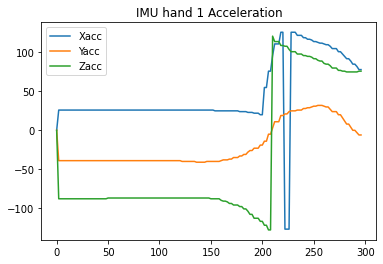

In [73]:
import matplotlib.pyplot as plt

IMU = 1

plt.plot(df.loc[df['IMU'] == IMU]['Xacc'], label='Xacc')
plt.plot(df.loc[df['IMU'] == IMU]['Yacc'], label='Yacc')
plt.plot(df.loc[df['IMU'] == IMU]['Zacc'], label='Zacc')
plt.title(f'IMU hand {IMU} Acceleration')
plt.legend()
plt.show()

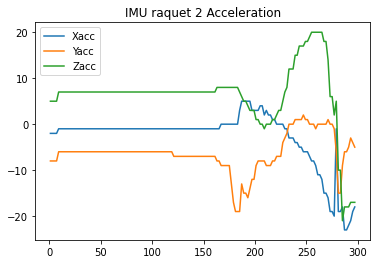

In [74]:
IMU = 2

plt.plot(df.loc[df['IMU'] == IMU]['Xacc'], label='Xacc')
plt.plot(df.loc[df['IMU'] == IMU]['Yacc'], label='Yacc')
plt.plot(df.loc[df['IMU'] == IMU]['Zacc'], label='Zacc')
plt.title(f'IMU raquet {IMU} Acceleration')
plt.legend()
plt.show()

##GYROSCOPE

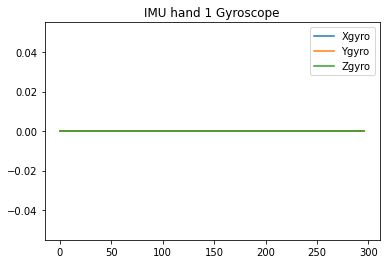

In [75]:
import matplotlib.pyplot as plt

IMU = 1

plt.plot(df.loc[df['IMU'] == IMU]['Xgyro'], label='Xgyro')
plt.plot(df.loc[df['IMU'] == IMU]['Ygyro'], label='Ygyro')
plt.plot(df.loc[df['IMU'] == IMU]['Zgyro'], label='Zgyro')
plt.title(f'IMU hand {IMU} Gyroscope')
plt.legend()
plt.show()

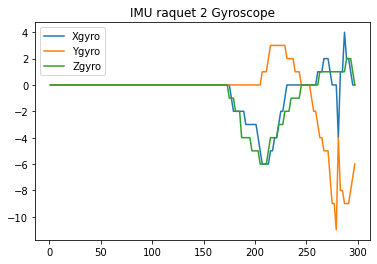

In [76]:
IMU = 2

plt.plot(df.loc[df['IMU'] == IMU]['Xgyro'], label='Xgyro')
plt.plot(df.loc[df['IMU'] == IMU]['Ygyro'], label='Ygyro')
plt.plot(df.loc[df['IMU'] == IMU]['Zgyro'], label='Zgyro')
plt.title(f'IMU raquet {IMU} Gyroscope')
plt.legend()
plt.show()

##Linear

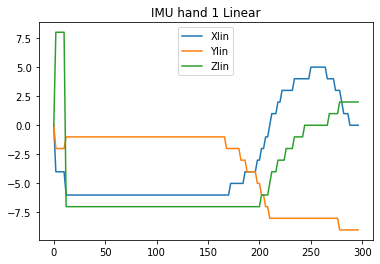

In [77]:
import matplotlib.pyplot as plt

IMU = 1

plt.plot(df.loc[df['IMU'] == IMU]['Xlin'], label='Xlin')
plt.plot(df.loc[df['IMU'] == IMU]['Ylin'], label='Ylin')
plt.plot(df.loc[df['IMU'] == IMU]['Zlin'], label='Zlin')
plt.title(f'IMU hand {IMU} Linear')
plt.legend()
plt.show()

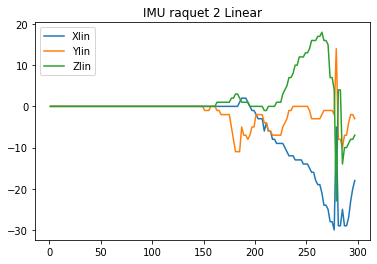

In [78]:
IMU = 2

plt.plot(df.loc[df['IMU'] == IMU]['Xlin'], label='Xlin')
plt.plot(df.loc[df['IMU'] == IMU]['Ylin'], label='Ylin')
plt.plot(df.loc[df['IMU'] == IMU]['Zlin'], label='Zlin')
plt.title(f'IMU raquet {IMU} Linear')
plt.legend()
plt.show()

## Some stats to analyse our data

In [ ]:
# (mean and std)
# gyro in hand is 0 
# grav in hand is 0 
# rot in raquette is 0

In [85]:
dataset_np.shape

(98, 149, 47)

In [92]:
np.mean(dataset_np,axis=0).shape

(149, 47)

In [94]:
mean_each_timestep = np.mean(dataset_np,axis=0)

In [100]:
mean_each_serve=np.mean(mean_each_timestep,axis=0)

In [ ]:
#  rot of raquet

In [101]:
mean_each_serve

array([ 3.39888371e+01, -2.04017943e+01, -9.15093823e+00, -1.55670456e+00,
        1.10189015e+01,  2.95980003e+01,  7.14628133e-01, -1.10875223e-01,
       -1.83536502e-02, -5.68415286e-03,  4.06108752e-02,  6.70456102e-02,
       -2.66888098e+00,  5.21640871e-01, -8.13039310e-01, -2.88830297e+00,
       -1.18579647e+00, -5.63772086e+00,  7.88248185e-02,  3.38994658e-02,
        4.07478428e-02,  1.69025476e+01,  1.86447062e+00,  2.00000000e+00,
       -4.80571155e+00, -6.92829749e+00,  1.52225723e+00,  5.52684564e+01,
       -2.04026846e+00,  4.90503356e+01, -9.98965895e+00,  3.50740310e+01,
       -1.52811944e+01,  2.25927955e-01,  1.34899329e+00, -2.60375291e-01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -4.32831119e+00,
       -6.81413505e-01, -1.56060814e+00, -4.07272976e-01, -6.22044925e+00,
        3.13361183e+00,  1.69025476e+01,  1.86447062e+00])

In [102]:
std_each_timestep = np.std(dataset_np,axis=0)

In [103]:
std_each_serve=np.std(mean_each_timestep,axis=0)

In [104]:
std_each_serve

array([ 7.08410744, 12.43749818, 15.32431286, 10.12536225,  5.89835495,
       12.39365587,  1.56024299,  0.75851911,  1.13544049,  0.0691507 ,
        0.49405262,  0.81564505,  3.64547009,  1.55292098,  1.8943933 ,
        1.51375587,  1.38739666,  3.35832667,  0.95894531,  0.4124048 ,
        0.4957189 , 14.01247199,  9.56755342,  0.        ,  5.3105728 ,
        1.86766442,  3.01373683, 18.02589607,  9.0828875 , 21.16865353,
       12.80986622,  4.62346791,  3.5303748 ,  0.56092248,  1.50653388,
        0.84630742,  0.        ,  0.        ,  0.        ,  4.44880331,
        1.48102852,  1.31356503,  1.30133368,  1.54239532,  1.87708175,
       14.01247199,  9.56755342])